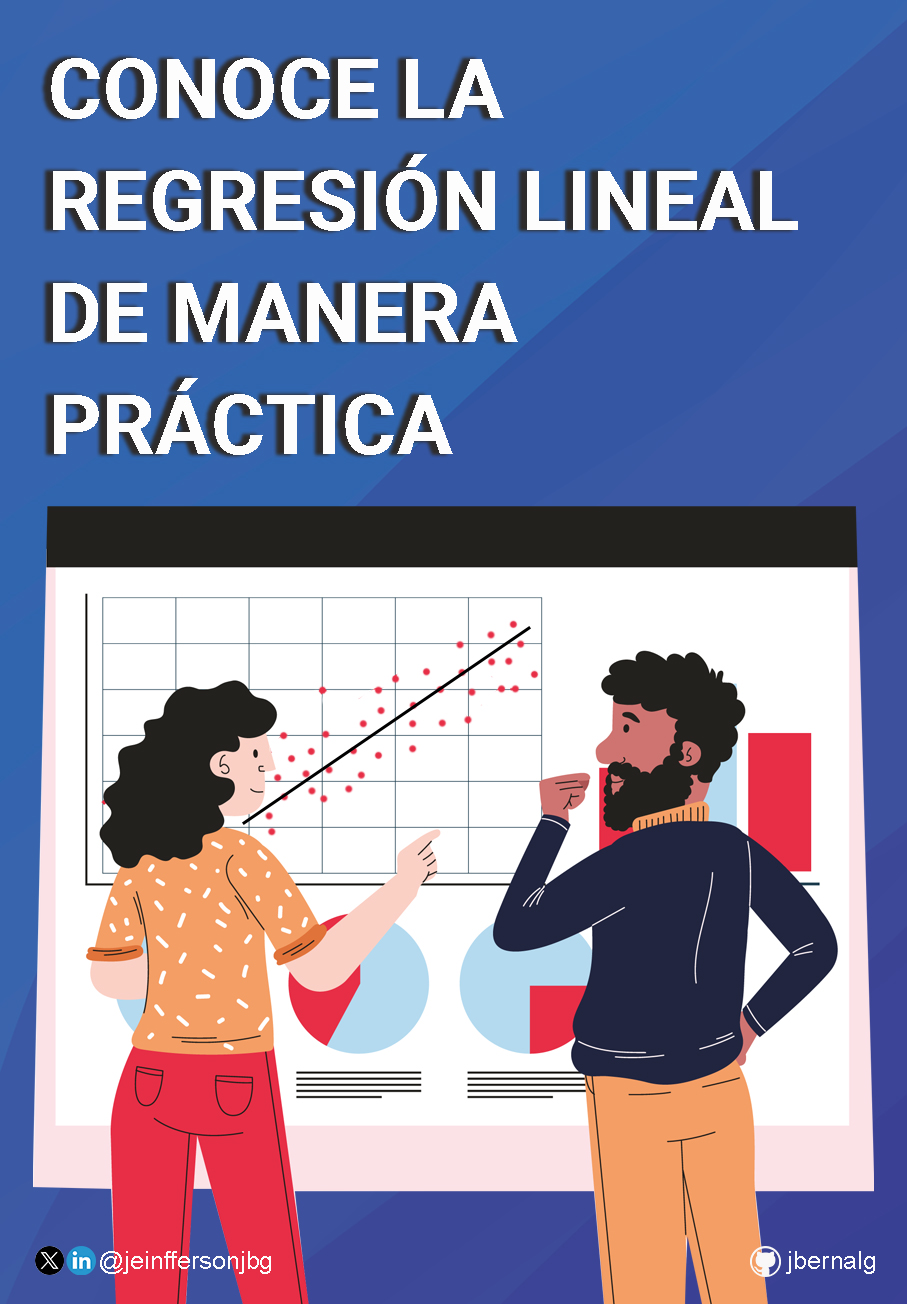

# Mi Primera Regresión Lineal 
En esta notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos
Los datos que utilizaremos son de viviendas de varios suburbios de Boston (Massachusetts), recopilados en 1978. Contiene 506 registros con datos sobre 14 características de las viviendas. Puedes encontrarlos en Kaggle en el siguiente [enlace.](https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset) 

Vamos a analizar las características que influyen sobre el precio de las viviendas y a partir de ellas, crear un modelo de predicción. 

In [79]:
# Libreria para manipular los datos
import pandas as pd
df = pd.read_csv('./housing.csv', header=None, sep='\s+')

In [80]:
# tamaño del dataset
df.shape

(506, 14)

In [81]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Las variables vienen sin los nombres por lo que debemos agregarlos

In [82]:
# Nombre de las columnas
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [83]:
# Asignamos el nombre de las columnas al df
df.columns = column_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Signicado de Nombres**:
- CRIM: Indice de delincuencia per capita por ciudad
- ZN: Poporcion de suelo residencial con lotes de mas de 25.000 pies cuadrados (sq.ft)
- INDUS: Proporcion de zonas industriales medidos en acres por ciudad
- CHAS: Charles River es una variable ficticia (1 si el tramo linda con el rio; 0 en caso contrario)
- NOX: Concentración de óxidos nítricos (partes por 10 millones)
- RM: Promedio de habitaciones por vivienda.
- AGE: Proporción de viviendas ocupadas por sus propietarios construidas antes de 1940
- DIS: Distancias ponderadas a cinco centros de empleo de Boston
- RAD: Indice de accesibilidad a las autopistas radiales
- TAX: Tipo de impuesto sobre bienes inmuebles de valor íntegro por $10.000
- PTRATIO: Tasa de alumnos-profesor por ciudad.
- B: 1000(Bk - 0.63)^2 donde Bk es la proporcion de afrodescendientes por ciudad
- LSTAT: Porcentaje de poblacion con bajo estatus
- MEDV: Precio promedio de las viviendas ocupadas por sus propietarios en miles de dólares

Verifiquemos los tipos de datos de las variables

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Todos son de tipo numérico, un caso bastante ideal para aplicar el modelo de Regresión Lineal. Lo siguiente es averiguar si la data contiene valores faltantes.

In [85]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Por suerte los datos están en el formato adecuado y libres de valores faltantes por lo que podemos pasar a la siguiente etapa 😅

## Entendiendo los datos
El siguiente paso es entender los datos y cómo están relacionados. Para ello, calculamos la correlación de todas las variables con la variable objetivo que en este caso es MEDV, el precio promedio de las viviendas y luego graficamos tales valores.

In [86]:
import seaborn as sns   # visualizacion de datos
import matplotlib.pyplot as plt # visualizacion de datos

In [87]:
# Estilo a los graficos
sns.set(style='whitegrid', context='notebook')

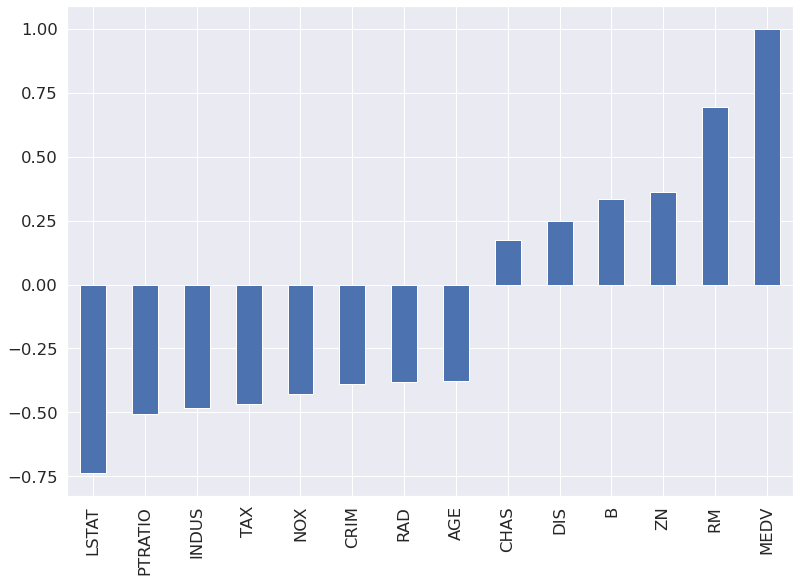

In [104]:
# Tamano del grafico
fig = plt.figure(figsize=(13,9))

# correlacion de todas las variables respecto a MEDV
df.corr()['MEDV'].sort_values(ascending=True).plot(kind='bar');

De la gráfica se deduce lo siguiente:

- La variable RM (Promedio de habitaciones por vivienda) es la que mayor correlación tiene con MEDV.
- La variable ZN (tamaño de la casa) también posee alta correlación positiva con MEDV.
- La variable INDUS (Proporción de zona industrial) está correlacionada negativamente con MEDV.
- La variable PTATRIO (Tasa de alumnos-profesor por ciudad) es la segunda con mayor correlación negativa con MEDV.
- La variable LSTAT (Porcentaje de población con bajo estatus) es la que mayor presenta correlación negativa con MEDV.

Ahora, elegimos las variables de mayor correlación con MEDV, incluyendo MEDV y las guardamos en una lista.

In [89]:

# Seleccion de las variables de interes
cols = ['ZN','LSTAT','PTRATIO','RM','MEDV']

Creamos una gráfica pairplot de seaborn para ver el comportamiento de MEDV respecto a las demás variables.

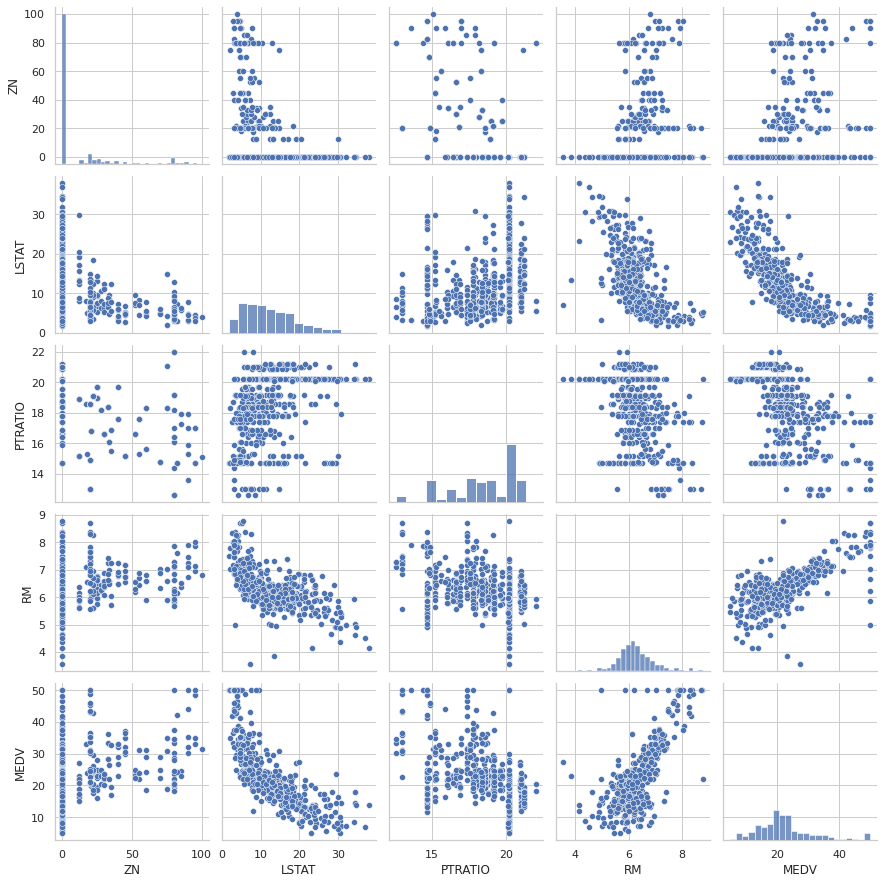

In [90]:
# Matriz de graficas que muestras todas las relaciones entre las variables
# height indica en tamano de los valores
sns.pairplot(df[cols], height=2.5);

La gráfica muestra lo siguiente: 
- Las variables RM y MEDV presentan un comportamiento lineal.
- Las variables LSTAT y MEDV muestra un comportamiento polinomial.

Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones. 

In [91]:
# importamos numpy
import numpy as np

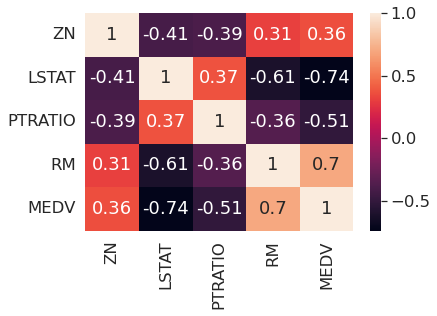

In [92]:
# calculo de correlaciones entre las variables
cm = np.corrcoef(df[cols].values.T)

# modificar tamano de valores en el grafico
sns.set(font_scale=1.5)

# heatmap para mostrar la informacion
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols);

Acá podemos constatar lo que muestra la gráfica pairplot: 
- Alta correlación positiva entre RM y MEDV (0.7)
- Alta correlación negativa entre LSTAT y MEDV (-0.74)

Nuestro objetivo es crear un modelo de regresión lineal para predecir el precio de las viviendas, por tanto elegimos la variable que presenta tal comportamiento, en este caso es RM, el promedio de habitaciones por vivienda, que tiende a una línea respecto a MEDV.

Elegimos a RM como la variable predictora y a MEDV como la variable objetivo.

## Creando modelo con scikit-learn

Una vez definido el modelo y seleccionadas las variables, procedemos a crearlo y entrenarlo con un subconjunto de los datos originales. El resto de los datos será utilizado para probar el modelo.

In [93]:
# Importamos librerias
from sklearn.preprocessing import  StandardScaler # ayuda a escalar los datos para que el modelo se ajuste mejor a ellos
from sklearn.linear_model import LinearRegression # funcion que se utiliza para la regresion
from sklearn.model_selection import train_test_split # divide los datos en conjunto de entrenamiento y de prueba

Definimos la variable objetivo y predictora

In [94]:
# Variable predictora
X = df['RM'].values.reshape(-1, 1)

# Variable objetivo
y = df['MEDV'].values.reshape(-1, 1)

Dividimos los datos en dos conjuntos: de entrenamiento y de prueba. Si no se especifica, por defecto la funcion divide los datos en un 80% en datos de entrenamiento y 20% en datos de prueba

In [103]:
# Entrenamiento: X_train, y_train
# Prueba: X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y)

# muestra primer dato de entrenamiento
X_train[0]

array([6.167])

Vemos que los datos estan en su escala original. Para que el modelo se ajuste mejor a los datos debemos estadarizarlos, proceso que consiste en cambiar la escala de valores a una adecuada para el modelo. El procedimiento es el siguiente:

In [96]:
# aplicamos los objetos StandardScaler a todos los datos de la variable objetivo y predictora
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

# asignamos los datos escalados y transformados a sus respectivas variables
# Entrenamiento
X_train = sc_x.transform(X_train)
y_train = sc_y.transform(y_train)
# Prueba
X_test = sc_x.transform(X_test)
y_test = sc_y.transform(y_test)

Ahora, pasamos a crear el modelo de Regresion Lineal

In [97]:
# Instanciamos el modelo a una variable
model = LinearRegression()

# ajustamos el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# generamos una prediccion con los datos de prueba
y_pred = model.predict(X_test)

# verificamos que se realizo la prediccion
y_pred.shape

(127, 1)

Este resultado indica que se generó una predicción a partir de 127 registros, utilizando los datos de prueba. Ya creado el modelo, pasamos a analizar sus resultados visualmente y mediante algunas métricas.

## Análisis de resultados

Para evaluar qué tan bien ajustado está el modelo a los datos, utilizamos dos métodos:
- Visualización entre los datos reales y los datos predichos.
- Cálculo de métricas como R-cuadrado y MSE.

### Visualización de los datos

Graficamos los valores de entrenamiento estandarizados y la gráfica de la regresión sólo para ver qué tan bien se ajusta el modelo a los datos visualmente.

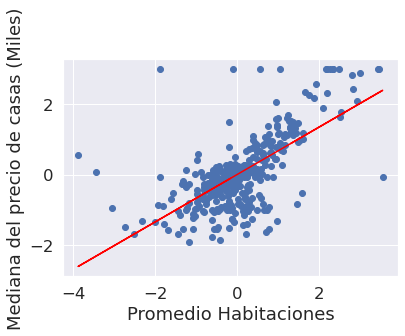

In [98]:
# grafica de los valores de entrenamiento estandarizados
plt.scatter(X_train, y_train)

# Grafica de regresion
plt.plot(X_train, model.predict(X_train), color='Red')
plt.ylabel('Mediana del precio de casas (Miles)')
plt.xlabel('Promedio Habitaciones');

Podemos observar que la gráfica de la regresión (línea roja) se ajusta bien a los datos estadarizados.

### Cálculo de Métricas
Las métricas que describen la efectividad del modelo para generar buenas predicciones son:
- MSE: El error cuadrático medio que compara los valores predichos con los valores reales. Mientras mas grande es esta métrica, peor se ajusta el modelo a los datos. Para datos estadarizados, el rango de valores de esta métrica es de -3 a 3.
- R-cuadrado: Coeficiente de determinación es una métrica que mide qué tan bien se ajusta el modelo con base a la varianza de los datos. Mientras más cerca de 1, mejor es el ajuste.

Calculemos las métricas...

In [99]:
# importamos libreria a utilizar
import sklearn.metrics as metrics

Evaluamos las métricas de los valores reales de prueba con los valores predichos

In [100]:
# MSE
mse = metrics.mean_squared_error(y_test, y_pred)

# R2
r2 = metrics.r2_score(y_test, y_pred)

# mostramos los resultados
print('R cuadrado: ',r2.round(4))
print('MSE: ', mse.round(4))


R cuadrado:  0.5715
MSE:  0.4354


El valor de R cuadrado no es muy alto lo que indica que el modelo posee una precisión mediana en cuanto a las predicciones. El MSE es bajo por lo que la diferencia entre los valores reales y predichos no es tan amplia.

En general, el modelo no es bueno!

## Generando predicciones con el modelo
**Cuál es el precio promedio de una casa que tiene 5 habitaciones?**

Creamos una función que al pasarle el número de habitaciones arroje el precio promedio dado por el modelo.

In [101]:
def Pred_Precio(num_hab):

    # estadanrizamos numero de habitaciones
    num_hab_std =- sc_x.transform(np.array([num_hab]).reshape(-1,1))

    # generamos la prediccion
    pred = model.predict(num_hab_std)

    # invertimos el valor de la prediccion en su valor real
    precio = sc_y.inverse_transform(pred)

    # mostramos resultado
    print(f'El precio de una casa con {num_hab} habitaciones en Boston es de {precio}')

In [102]:
# prediccion para una casa de 5 habitaciones
Pred_Precio(5)

El precio de una casa con 5 habitaciones en Boston es de [[33.7939838]]
